# Práctica 8. Análisis de clasificación con KNN

K  nearest neighbors (vecinos más crecanos) es un algoritmo simple que almacena todos los casos disponibles y clasifica los nuevos casos en función de una medida de similitud (por ejemplo, funciones de distancia). KNN se ha utilizado en la estimación estadística y el reconocimiento de patrones ya a principios de la década de 1970 como una técnica no paramétrica.

In [1]:
#importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# importamos nuestro dataset
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [7]:
# estadarizamos n¿los datos exeecpto la columna con que vamos a trabajar
scaler.fit(df.drop('quality', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
# trasformamos esas caracteristicas yanormalizadas
scaled_features = scaler.transform(df.drop('quality', axis=1))

In [10]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df_feat
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [14]:
# algoritmo knn
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [17]:
pred = knn.predict(X_test)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[  0   1   3   1   0   0]
 [  0   1   8   9   1   0]
 [  0   8 143  49   8   0]
 [  0   2  45 102  28   3]
 [  0   0   7  19  36   1]
 [  0   0   0   2   2   1]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.08      0.05      0.06        19
           5       0.69      0.69      0.69       208
           6       0.56      0.57      0.56       180
           7       0.48      0.57      0.52        63
           8       0.20      0.20      0.20         5

   micro avg       0.59      0.59      0.59       480
   macro avg       0.34      0.35      0.34       480
weighted avg       0.58      0.59      0.58       480



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
#elegimos los k vecinos que menor error genere
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Tasa de error')

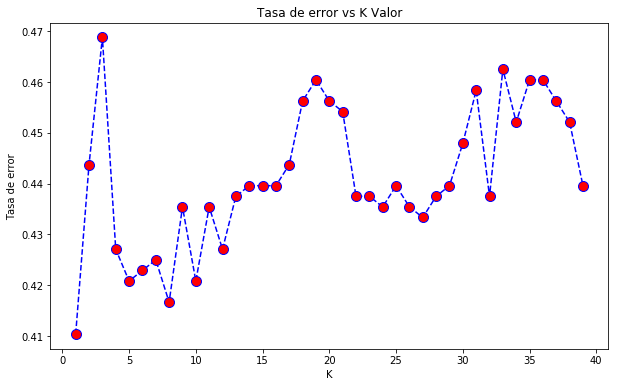

In [28]:
# greaficamos la lista de errores segun k
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Tasa de error vs K Valor')
plt.xlabel('K')
plt.ylabel('Tasa de error')

Vemos que el valor de k=1 es el mejor pero escogeremos un valor k=8 para ver si la tasa de error aumenta o baja.

In [39]:
#actualizamos en numero de vecinos y las matrices
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[  0   1   2   2   0   0]
 [  0   0  13   5   1   0]
 [  0   5 144  55   4   0]
 [  0   0  48 112  20   0]
 [  0   0   6  33  24   0]
 [  0   0   0   2   3   0]]


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        19
           5       0.68      0.69      0.68       208
           6       0.54      0.62      0.58       180
           7       0.46      0.38      0.42        63
           8       0.00      0.00      0.00         5

   micro avg       0.58      0.58      0.58       480
   macro avg       0.28      0.28      0.28       480
weighted avg       0.55      0.58      0.57       480



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


La presición baja en algunos casos y también la tasa de error media.